
## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **LOADING DATASET**

In [ ]:
df=pd.read_csv("aerofit_treadmill.csv")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Problem Statement: The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.**


# **BASIC ANALYSIS:**

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Total 180 rows and 9 columns in the dataset. We dont have any null values**

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

***There are no null values in dataset***

**Changing the datatype of Product, Gender and Marital Status to Category**

In [ ]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

# **STATISTICAL SUMMARY OF DATA**

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


***We can see that mean age of customers is 28 with income of around 53,700***

***Here we can see that for some columns, mean and median(50 percentile) values are not very close. This means there are few outliers in the dataset.***


# **GRAPHICAL ANALYSIS OF CATEGORICAL DATA**

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

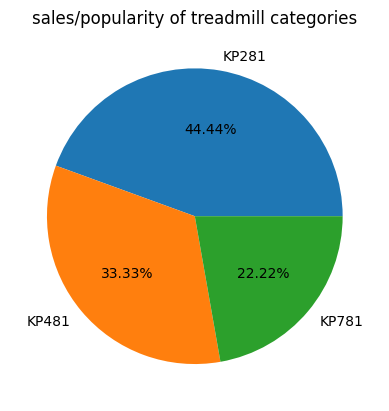

In [ ]:
plt.pie(df['Product'].value_counts().values, labels=df['Product'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('sales/popularity of treadmill categories')
plt.show()

**Percentage of KP281 sold = 44.44%**

**Percentage of KP481 sold = 33.33%**

**Percentage of KP781 sold = 22.22%**

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

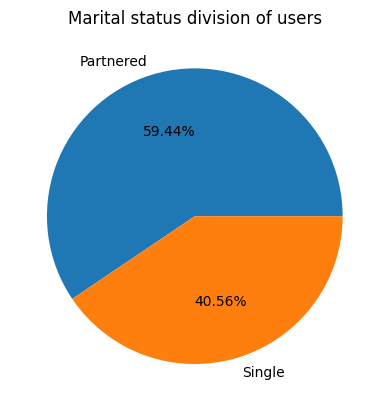

In [ ]:
plt.pie(df['MaritalStatus'].value_counts().values, labels=df['MaritalStatus'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('Marital status division of users')
plt.show()

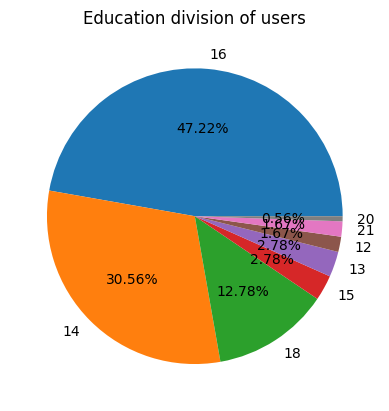

In [ ]:
(df['Education'].unique())
df['Education'].value_counts()
plt.pie(df['Education'].value_counts().values, labels=df['Education'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('Education division of users')
plt.show()

**47.22% of the buyers lie in 16 years educated population, followed by 14 years of educated people.**

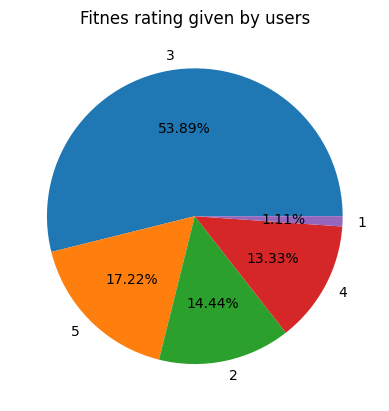

In [ ]:
df['Fitness'].unique()
df['Fitness'].value_counts()
plt.pie(df['Fitness'].value_counts().values, labels=df['Fitness'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('Fitnes rating given by users')
plt.show()

**53.89% users have rated themselves at fitness level 3. This means that they might be moderately active and are focusing on becoming more active and fit.**

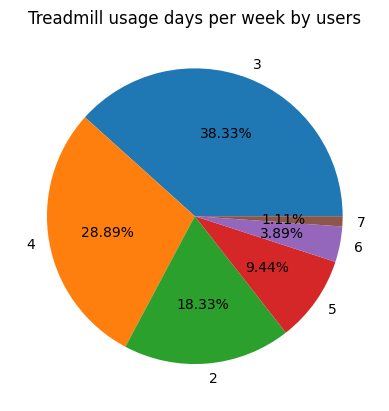

In [ ]:
df['Usage'].unique()
df['Usage'].value_counts()
plt.pie(df['Usage'].value_counts().values, labels=df['Usage'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('Treadmill usage days per week by users')
plt.show()

**38.33% of users use treadmill 3 times a week.**

In [ ]:
data = df.groupby('Product')['Miles'].mean()
data

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

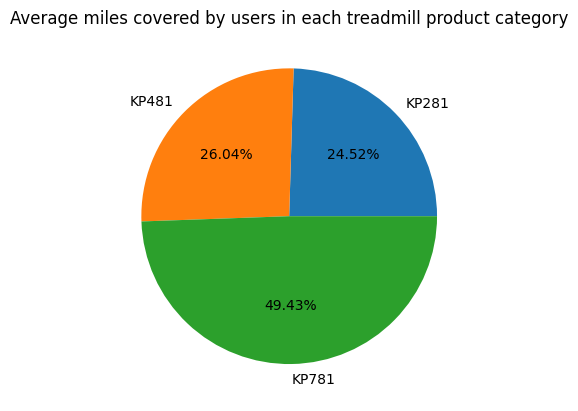

In [ ]:
# sns.barplot(data=data, x='Product', y='Miles')

plt.pie(data.values, labels=data.index, radius=1, autopct='%1.2f%%')
plt.title('Average miles covered by users in each treadmill product category')
plt.show()


**KP781 records the highest mean miles from current users. From this we can assume that users using KP781 are more active towards achieving their fitness goals.**

**Relation between Income of population and Products:**

<Axes: xlabel='Gender', ylabel='Income'>

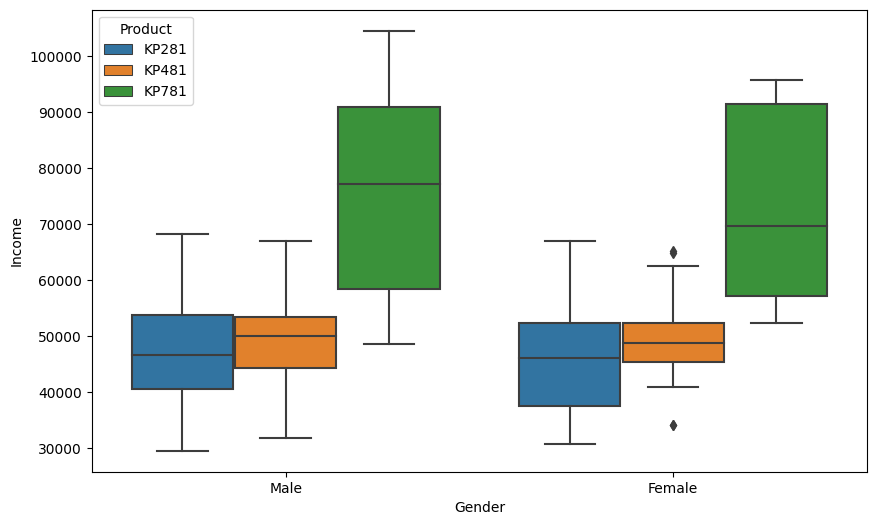

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Gender', y='Income', hue='Product')
plt.show()


**High Income population are buying KP781 more**

# **OUTLIER ANALYSIS:**

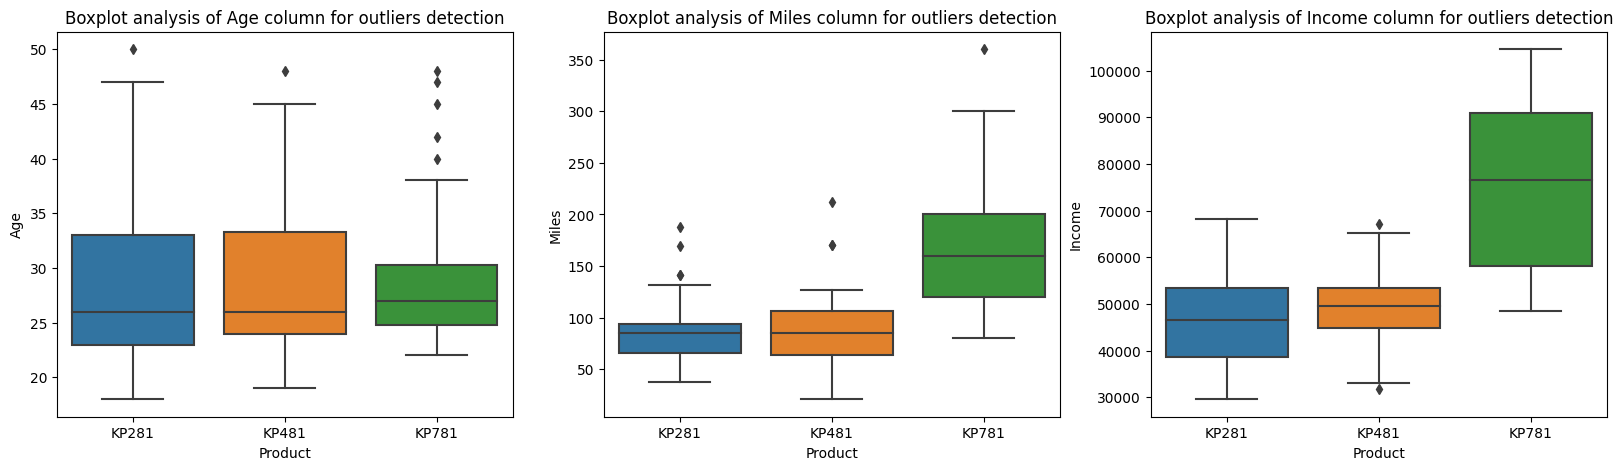

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(data=df, y='Age', x='Product')
plt.title('Boxplot analysis of Age column for outliers detection')

plt.subplot(1,3,2)
sns.boxplot(data=df, x='Product', y='Miles')
plt.title('Boxplot analysis of Miles column for outliers detection')

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Product', y='Income')
plt.title('Boxplot analysis of Income column for outliers detection')
plt.show()

**The IQR method, is a method for identifying outliers in a dataset. It is based on the interquartile range, which is the difference between the 75th and 25th percentiles of the dataset. Data points that are outside of the range of 1.5IQR to 3IQR are considered outliers**

In [ ]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.75)
iqr = q2-q1
iqr

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [ ]:
df.shape

(180, 9)

# **REMOVING THE OUTLIERS**

In [ ]:
df_out = df[~((df<(q1-(1.5*iqr)))|(df>(q2+(1.5*iqr)))).any(axis=1)]

In [ ]:
df_out.shape

(146, 9)

In [ ]:
df_out.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,28.006849,15.150685,3.164384,3.075342,48053.650685,88.034247
std,6.259334,1.266777,0.813908,0.743576,8852.564836,30.364093
min,18.000000,12.000000,2.000000,2.000000,29562.000000,38.000000
25%,23.000000,14.000000,3.000000,3.000000,42069.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53439.000000,105.250000
max,46.000000,18.000000,5.000000,5.000000,68220.000000,180.000000


In [ ]:
df=df_out

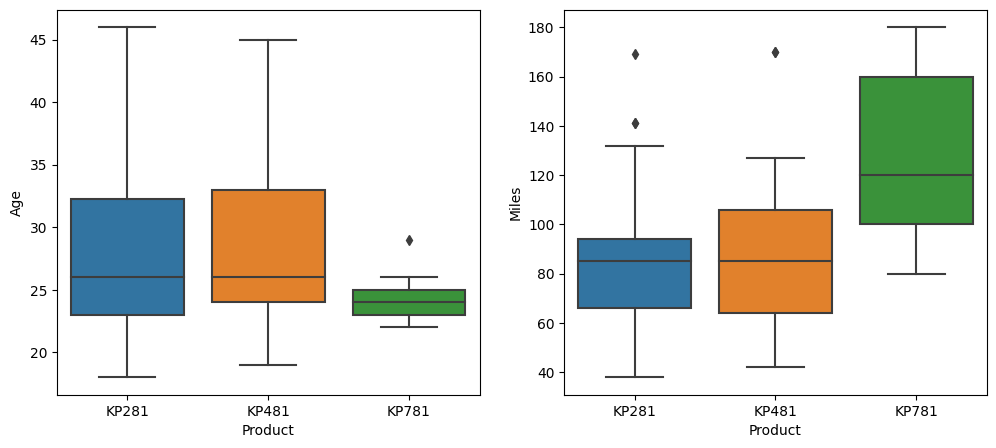

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Age', x='Product')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Product', y='Miles')

plt.show()

***We can see that the outliers are reduced now.***

# **ANALYSIS OF CATEGORICAL DATA**

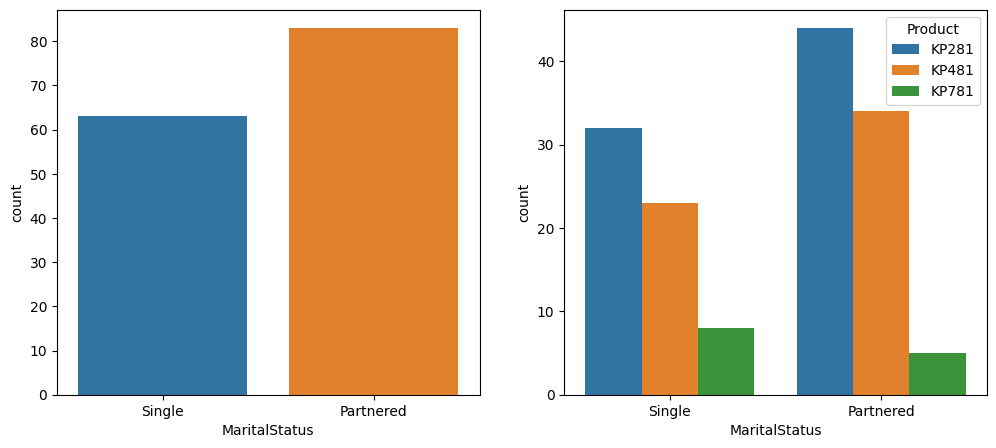

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='MaritalStatus')
plt.subplot(1,2,2)
sns.countplot(data=df, x='MaritalStatus', hue='Product')
plt.show()

**Married people bought more treadmill than single people.**
***Among both married and singles, KP281 is the top seller, followed by KP481 and KP781. Singles are buying more KP781, which is most expensive***

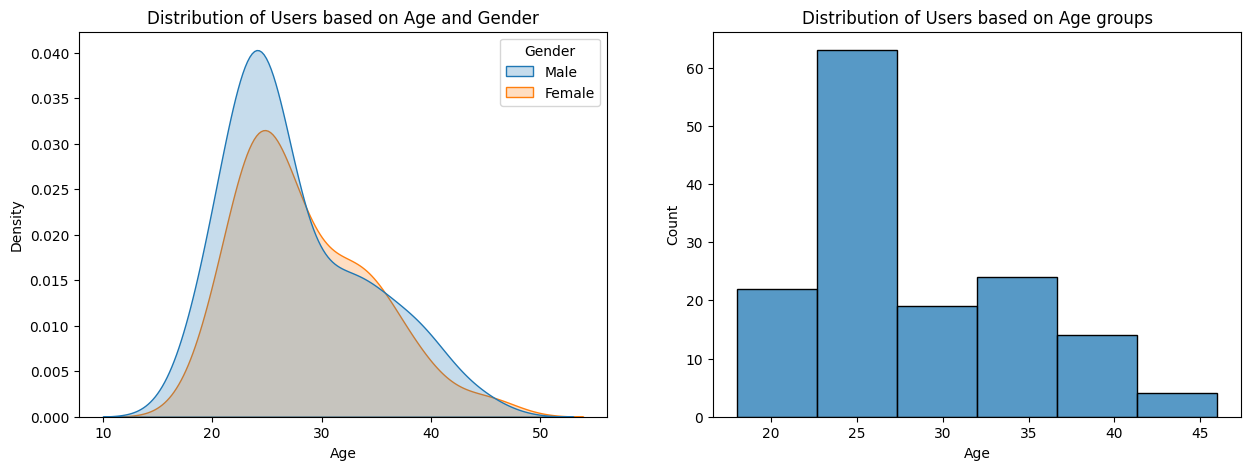

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.histplot(data=df, x='Age', bins=6)
plt.title('Distribution of Users based on Age groups')

plt.subplot(1,2,1)
sns.kdeplot(data=df, x='Age', hue='Gender', shade=True)
plt.title('Distribution of Users based on Age and Gender')
plt.show()


***Age 25-30 have the highest number of buyers. Among which, Male buyers are more than female buyers***

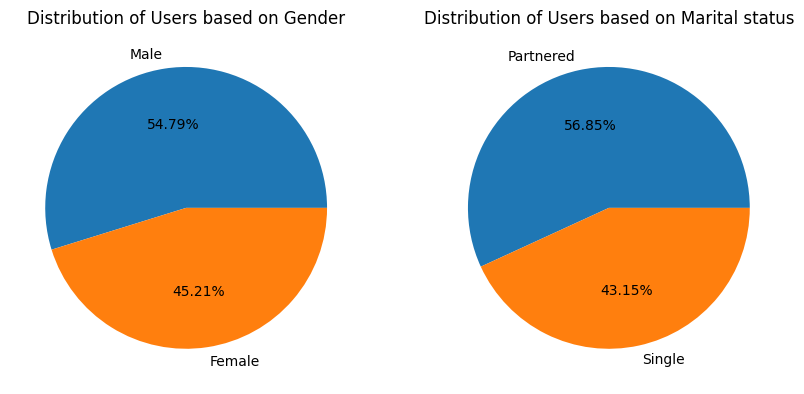

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts().values, labels=df['Gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Distribution of Users based on Gender')

plt.subplot(1,2,2)
plt.pie(df['MaritalStatus'].value_counts().values,labels = df['MaritalStatus'].value_counts().index, autopct='%1.2f%%')
plt.title('Distribution of Users based on Marital status')
plt.show()

***Male population is more than female,***

***Married population is more than single***

# **CORRELATION**

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.296460,-0.069262,-0.077163,0.653214,-0.081065
Education,0.296460,1.000000,0.216611,0.266085,0.499156,0.126448
Usage,-0.069262,0.216611,1.000000,0.480794,0.161925,0.660024
Fitness,-0.077163,0.266085,0.480794,1.000000,0.176077,0.712510
Income,0.653214,0.499156,0.161925,0.176077,1.000000,0.169500
Miles,-0.081065,0.126448,0.660024,0.712510,0.169500,1.000000


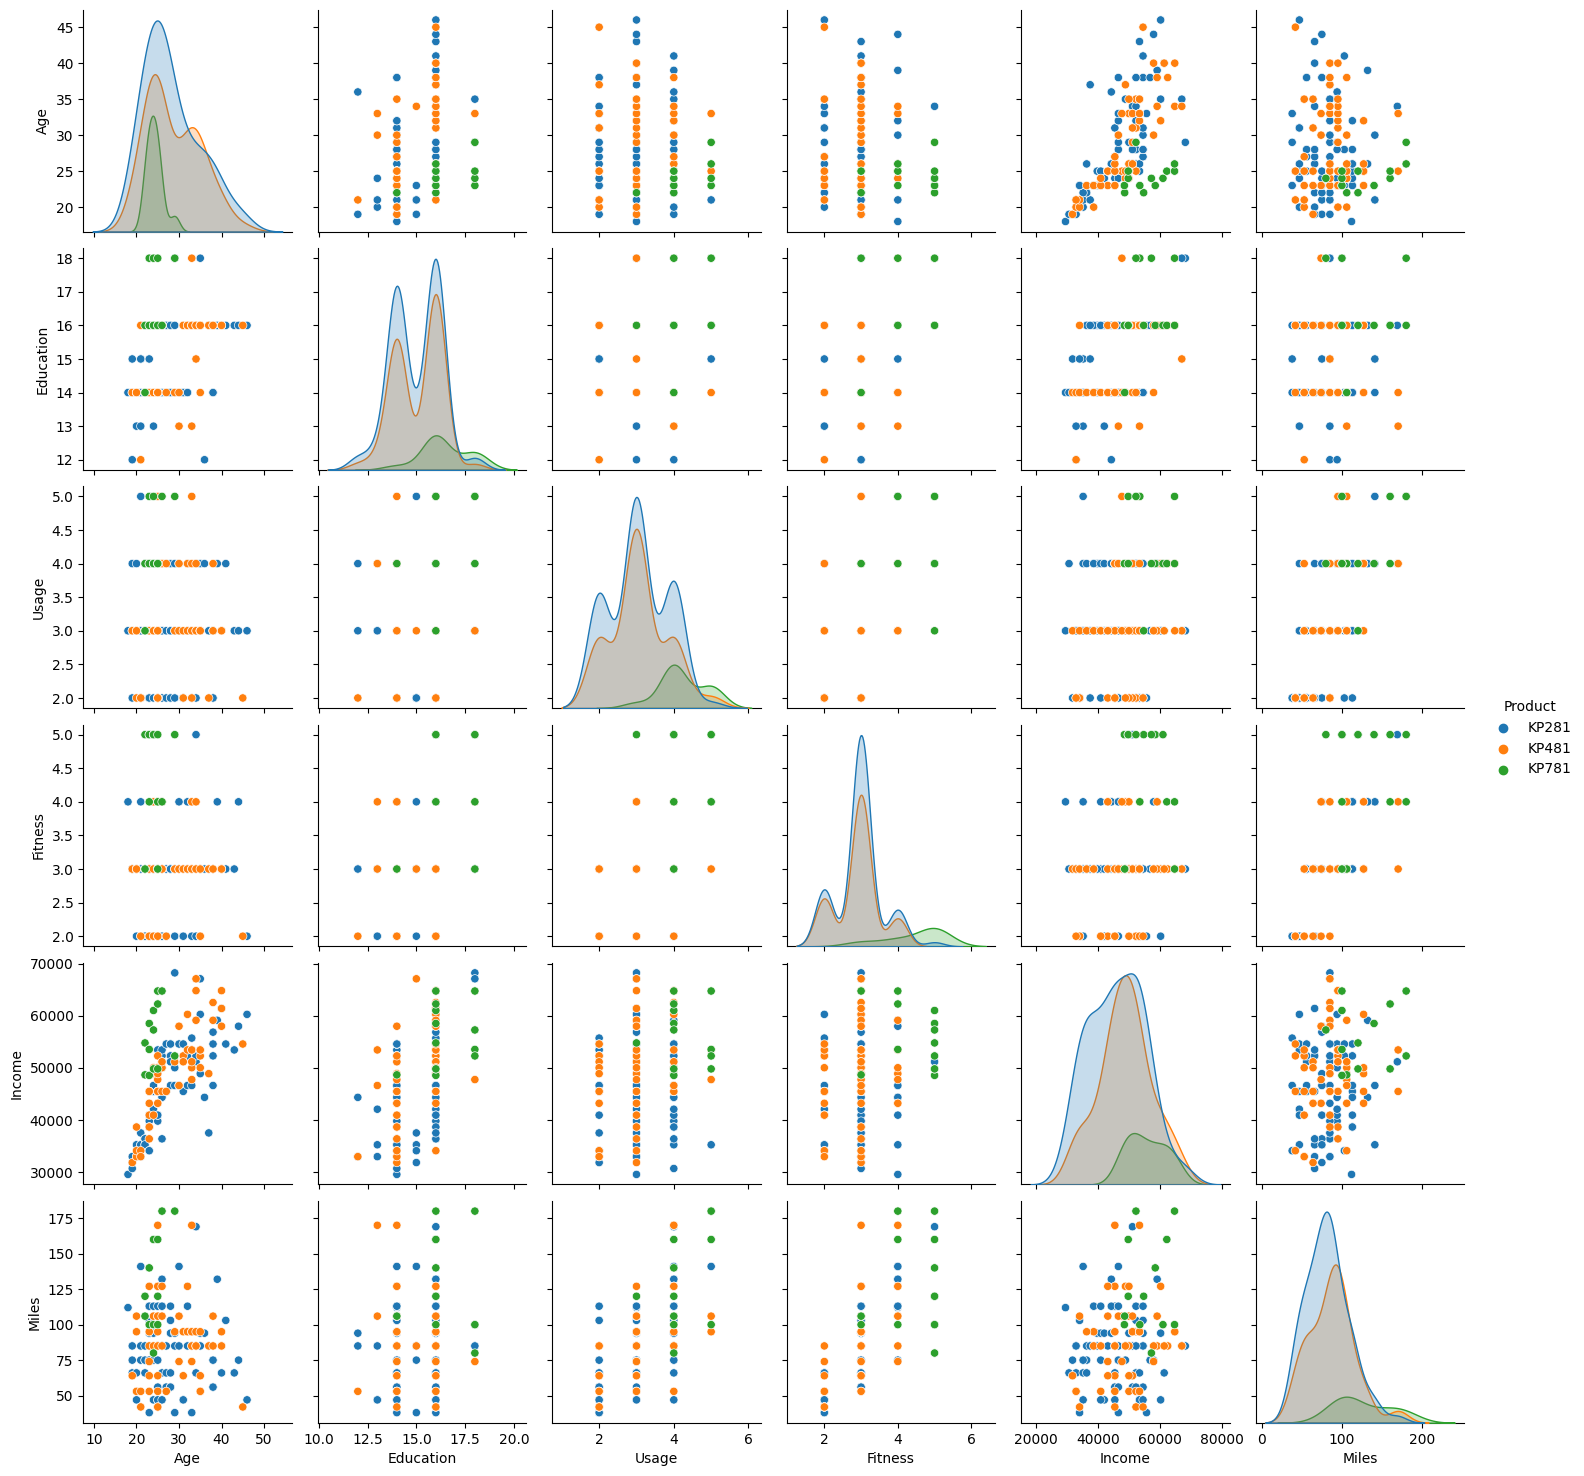

In [ ]:
# plt.figure(figsize=(10,6))
sns.pairplot(data=df, hue='Product')
plt.show()

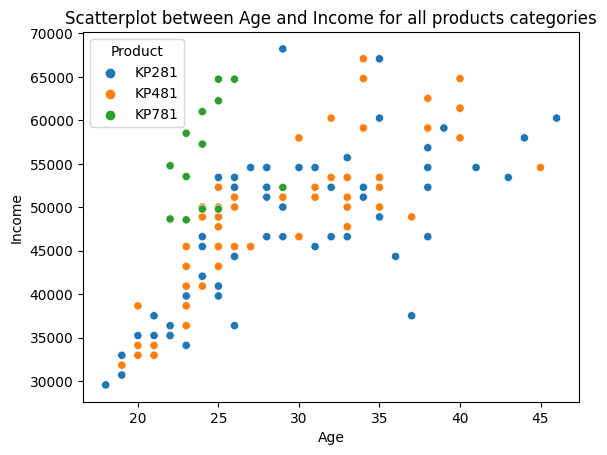

In [ ]:
sns.scatterplot(data=df, x='Age', y='Income', hue='Product')
plt.title('Scatterplot between Age and Income for all products categories')
plt.show()

***We can see the increase in income with age. Age group of 20 to 30 with income of 47K to 65K buys most of KP781 model. While other 2 models are equally distributed among age and income***


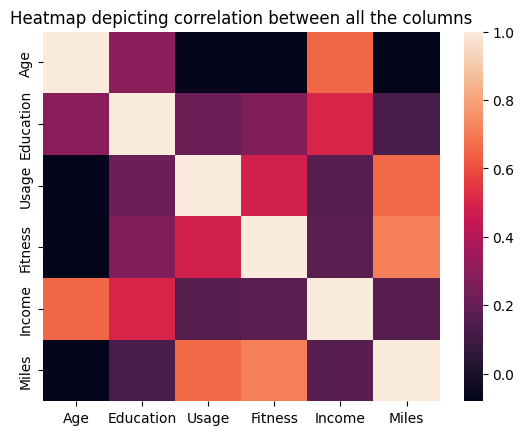

In [ ]:
sns.heatmap(df.corr())
plt.title('Heatmap depicting correlation between all the columns')

plt.show()

# **CONTINGENCY TABLE**


***A contingency table, also known as a cross-tabulation or a two-way frequency table, is a table used to display the frequency distribution of two categorical variables.***

In [ ]:
#Prepare an age group column for simplicity for creating contingency table:
age_labels = ['1-9', '10-19', '20-29', '30-39', '40-49', '49-59']
bins = [1, 10, 20, 30, 40, 50, 60]

# Use pd.cut() to create the "age_group" column
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=age_labels, right=False)
df.head(5)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,10-19
1,KP281,19,Male,15,Single,2,3,31836,75,10-19
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-19
3,KP281,19,Male,12,Single,3,3,32973,85,10-19
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-29


In [ ]:
# Contingency table for KP281
contingency_table_KP281 = pd.crosstab(df['Gender'], df['Education'])

# Contingency table for KP481
contingency_table_KP481 = pd.crosstab(df['MaritalStatus'], df['Fitness'])

# Contingency table for KP781
contingency_table_KP781 = pd.crosstab(df['Income'], df['age_group'])


In [ ]:
print("Contingency table for KP281:")
print(contingency_table_KP281)

print("\nContingency table for KP481:")
print(contingency_table_KP481)

print("\nContingency table for KP781:")
print(contingency_table_KP781)


Contingency table for KP281:
Education  12  13  14  15  16  18
Gender                           
Female      0   1  29   2  31   3
Male        3   4  24   3  42   4

Contingency table for KP481:
Fitness         2   3   4  5
MaritalStatus               
Partnered      18  54   9  2
Single          8  38  10  7

Contingency table for KP781:
age_group  10-19  20-29  30-39  40-49
Income                               
29562          1      0      0      0
30699          1      0      0      0
31836          2      0      0      0
32973          1      4      0      0
34110          0      4      0      0
35247          0      5      0      0
36384          0      4      0      0
37521          0      1      1      0
38658          0      4      0      0
39795          0      2      0      0
40932          0      6      0      0
42069          0      2      0      0
43206          0      5      0      0
44343          0      2      1      0
45480          0     13      1      0
46617        

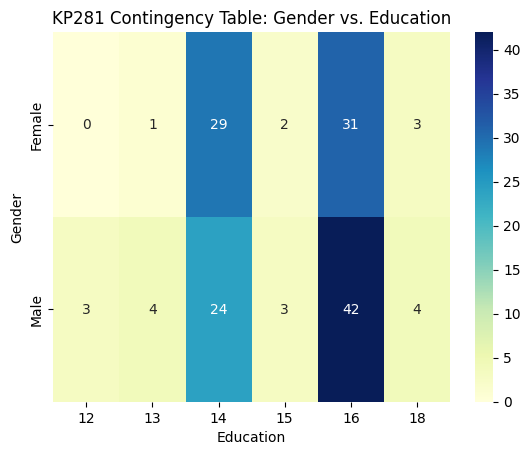

In [ ]:
sns.heatmap(contingency_table_KP281, annot=True, cmap="YlGnBu", fmt="d")
plt.title("KP281 Contingency Table: Gender vs. Education")
plt.show()


***So here, we can see that Male users who have 16 years od education have the highest frequency of buying KP281 and Female users who have 16 years of education has 2nd highest frequency of buying KP281 model***

<Figure size 800x500 with 0 Axes>

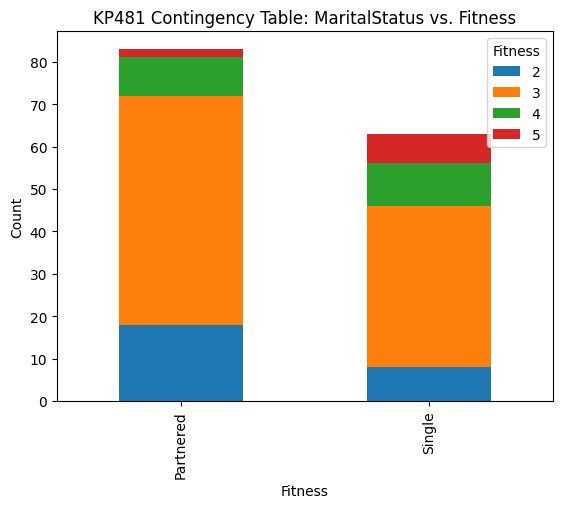

In [ ]:
plt.figure(figsize=(8,5))
contingency_table_KP481.plot(kind="bar", stacked=True)
plt.title("KP481 Contingency Table: MaritalStatus vs. Fitness")
plt.xlabel("Fitness")
plt.ylabel("Count")
plt.legend(title="Fitness", loc="upper right")
plt.show()


**Partnered users with fitness rating 3 has highest frequency of buying KP481 followed by Single users with fitness rating 3**

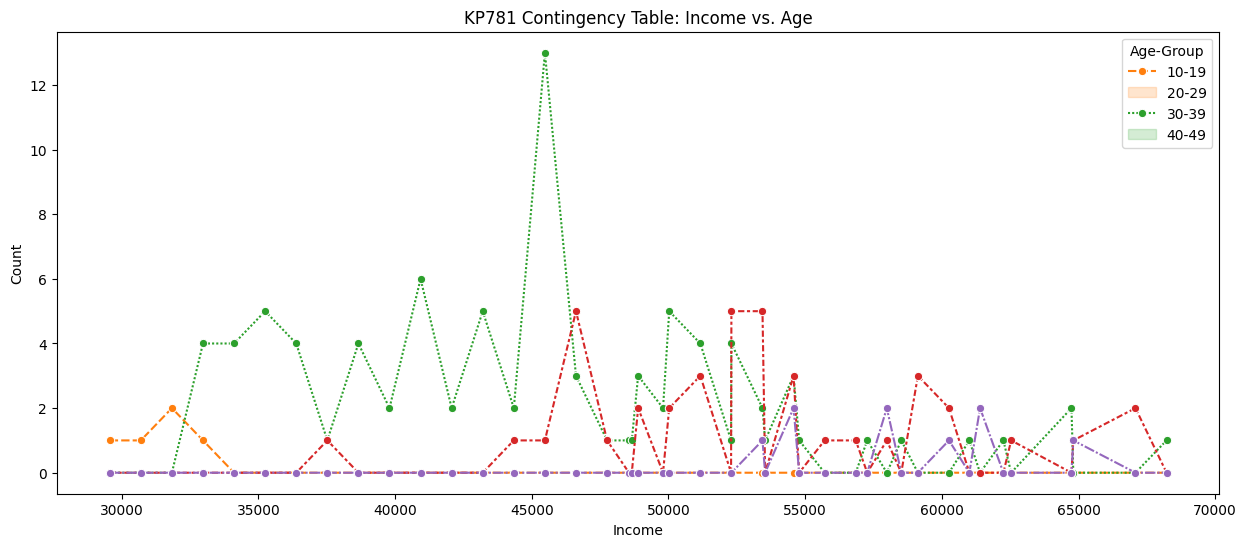

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=contingency_table_KP781, marker='o')
plt.title("KP781 Contingency Table: Income vs. Age")
plt.xlabel("Income")
plt.ylabel("Count")
plt.legend(title="Age-Group", loc="upper right", labels=contingency_table_KP781.columns)
plt.show()


***Users in income range 45K to 50K in age group 30 to 39 have the highest frequency of buyers.***

# **MARGINAL PROBABILITY**

**what percent of customers have purchased KP281, KP481, or KP781 in a table**

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,10-19
1,KP281,19,Male,15,Single,2,3,31836,75,10-19
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-19
3,KP281,19,Male,12,Single,3,3,32973,85,10-19
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-29


In [ ]:
cross_tab = pd.crosstab(df['Product'],columns='count')
print(cross_tab)
marginal_probability = cross_tab/cross_tab.sum()

col_0    count
Product       
KP281       76
KP481       57
KP781       13


In [ ]:
marginal_probability.columns = ['Probability']
marginal_probability = marginal_probability.reset_index().sort_index()
print(marginal_probability)

  Product  Probability
0   KP281     0.520548
1   KP481     0.390411
2   KP781     0.089041


<Axes: xlabel='Product', ylabel='Probability'>

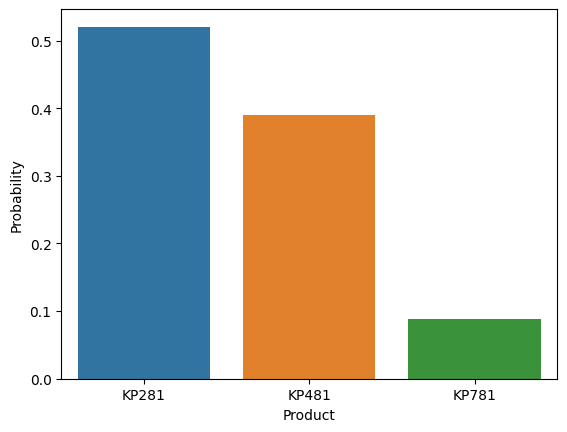

In [ ]:
sns.barplot(data=marginal_probability, x='Product', y='Probability')

***KP281 has highest probability of selling (52.05%), followed by KP481 (39.04%) and KP781(8.9%)***

**MARGINAL PROBABILITY: What is the probability of a male customer buying a KP781 treadmill?**

In [ ]:
cross_tab_product_gender = pd.crosstab(df['Product'],columns=df['Gender'])
print(cross_tab_product_gender)
print("-----------------------------------------------")
marginal_prob_product_gender = cross_tab_product_gender/cross_tab_product_gender.sum()
print(marginal_prob_product_gender)

Gender   Female  Male
Product              
KP281        38    38
KP481        27    30
KP781         1    12
-----------------------------------------------
Gender     Female   Male
Product                 
KP281    0.575758  0.475
KP481    0.409091  0.375
KP781    0.015152  0.150


In [ ]:
df_marginal_prob = marginal_prob_product_gender.reset_index()
print(df_marginal_prob)

Gender Product    Female   Male
0        KP281  0.575758  0.475
1        KP481  0.409091  0.375
2        KP781  0.015152  0.150


***probability of a male customer buying a KP781 treadmill -> 0.15***

***probability of a Female customer buying a KP781 treadmill -> 0.015***

***This shows that the proability of buying KP781 (which is the most expensive tredmill) is higher for male population.***

# **CONDITIONAL PROBABILITY**

**GIVEN : income range between 40K to 60K**

**FIND: probability of age between 20 to 30**

In [ ]:

subset_df = df[(df['Income'] >= 40000) & (df['Income'] <= 60000)]

age_range_count = len(subset_df[(subset_df['Age'] >= 20) & (subset_df['Age'] <= 30)])
total_subset_count = len(subset_df)

conditional_probability = age_range_count / total_subset_count

print("Conditional Probability (P(Age between 20 to 30 | Income between 40K to 60K)):", conditional_probability)


Conditional Probability (P(Age between 20 to 30 | Income between 40K to 60K)): 0.6534653465346535


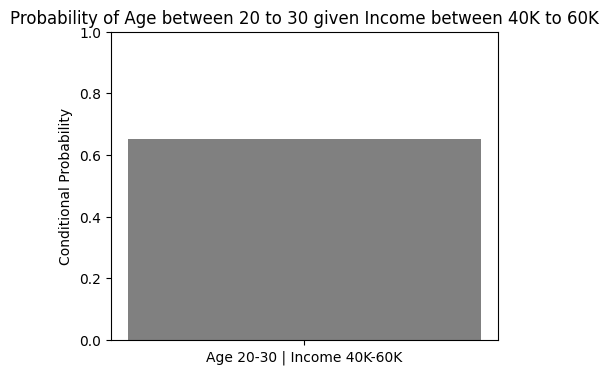

In [ ]:
# Plotting the conditional probability
plt.figure(figsize=(5,4))
plt.bar(["Age 20-30 | Income 40K-60K"], [conditional_probability], color='gray')
plt.ylabel('Conditional Probability')
plt.title('Probability of Age between 20 to 30 given Income between 40K to 60K')
plt.ylim(0, 1)
plt.show()

**GIVEN : Buyer's Gender is Male**

**FIND: probability that he will be married/partnered**

In [ ]:
subset_male = df[df.Gender=='Male']
total_male = len(subset_male)

married_male = subset_male[subset_male['MaritalStatus']=='Partnered']
total_married_male = len(married_male)
cond_prob_married_male = total_married_male/total_male

print("Probability of User is married give that user is Male",cond_prob_married_male)

Probability of User is married give that user is Male 0.55


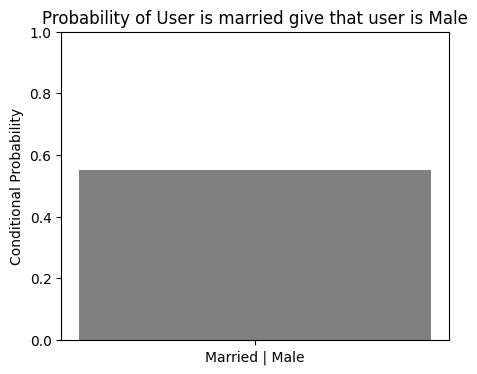

In [ ]:
# Plotting the conditional probability
plt.figure(figsize=(5,4))
plt.bar(["Married | Male"], [cond_prob_married_male], color='gray')
plt.ylabel('Conditional Probability')
plt.title('Probability of User is married give that user is Male')
plt.ylim(0, 1)
plt.show()

## **JOINT PROBABILITY**

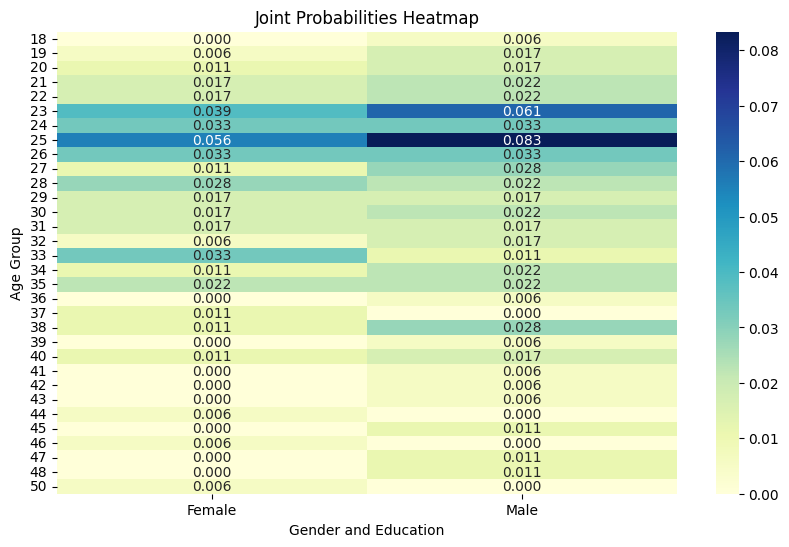

In [ ]:
# Create a contingency table using pd.crosstab()
contingency_table = pd.crosstab(index=df['Age'], columns=[df['Gender']])

# Calculate the total count to get the probabilities
total_count = contingency_table.sum().sum()

# Calculate the joint probabilities by dividing each cell's count by the total count
joint_probabilities = contingency_table / total_count


plt.figure(figsize=(10, 6))
sns.heatmap(joint_probabilities, cmap='YlGnBu', annot=True, fmt=".3f")
plt.title('Joint Probabilities Heatmap')
plt.xlabel('Gender and Education')
plt.ylabel('Age Group')
plt.show()


# **CUSTOMER PROFILING - CATEGORIZATION OF USERS**

**Categorizing users on Income range, age and Education**

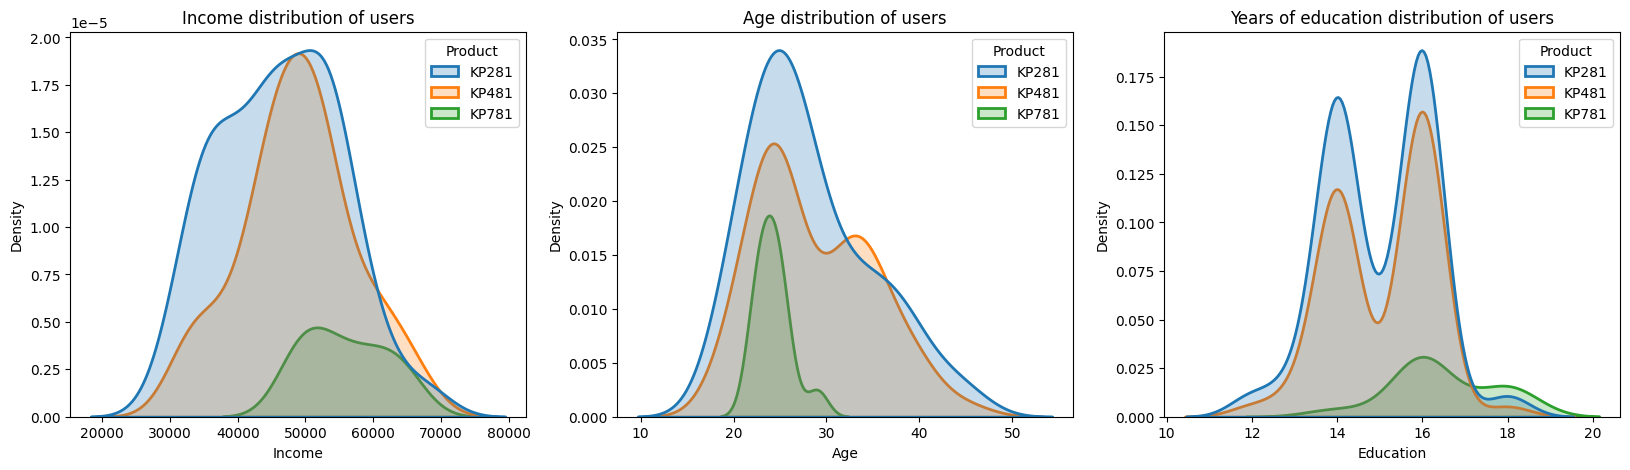

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(data = df, x='Income', hue='Product', shade=True, color='blue',linewidth=2)
plt.title('Income distribution of users')
plt.subplot(1,3,2)
sns.kdeplot(data=df, x='Age', shade=True, hue='Product', linewidth=2)
plt.title('Age distribution of users')
plt.subplot(1,3,3)
sns.kdeplot(data = df, x='Education', hue='Product', shade=True, color='blue',linewidth=2)
plt.title('Years of education distribution of users')
plt.show()

**INCOME:**

***Focus on selling KP781 to users having income range greater than 45K***

***Focus on selling KP281 and KP481 to users having income between 30K to 70K***

**AGE:**

***Focus on selling KP781 to age group of 20-30***

***Focus on selling KP281 and KP481 to age group of 10 to 50***

**EDUCATION:**

***Not much reliable information on basis of education, but we can see that people educated for 14 and 16 years are contributing to most of the sale.***

**Categorizing users on Marital satus and Gender**

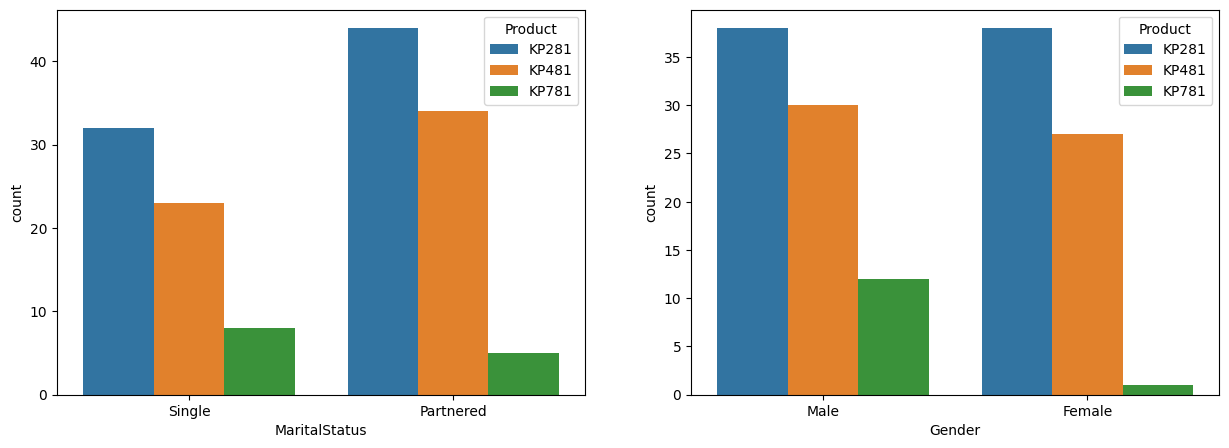

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='MaritalStatus', hue='Product')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Gender', hue='Product')
plt.show()

**MARITAL STATUS:**

***Focus on selling KP281 and KP481 to Partnered population and KP781 to Single pulation.***

**GENDER:**

***Both male and female are buying treadmill. But Male category is buying more KP781 treadmill which is the most expensive one.***

***So focus on selling KP781 to Male population***

# **CALCULATING PRODUCT CONTRIBUTING TO HIGHEST SALES**

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,10-19
1,KP281,19,Male,15,Single,2,3,31836,75,10-19
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-19
3,KP281,19,Male,12,Single,3,3,32973,85,10-19
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-29


**Price of KP281 is 1500, Price of KP481 is 1750 and price of KP781 is 2500**

***(All values are in Dollars)***

In [ ]:
price_map = {
    'KP281':1500,
    'KP481':1750,
    'KP781':2500
}
df['Price'] = df['Product'].map(price_map)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Price
0,KP281,18,Male,14,Single,3,4,29562,112,10-19,1500
1,KP281,19,Male,15,Single,2,3,31836,75,10-19,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-19,1500
3,KP281,19,Male,12,Single,3,3,32973,85,10-19,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,20-29,1500


In [ ]:
df_sales = df.groupby('Product')['Price'].sum().reset_index()
df_sales

,Product,Price
0,KP281,114000
1,KP481,99750
2,KP781,32500


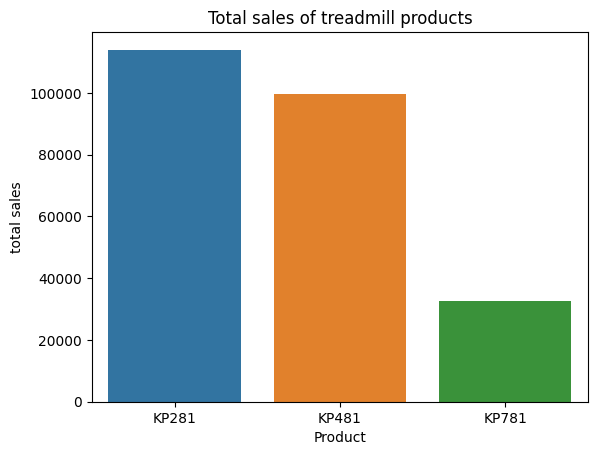

In [ ]:
sns.barplot(data=df_sales, x='Product',y='Price')
plt.ylabel("total sales")
plt.title('Total sales of treadmill products')
plt.show()

**Clearly, KP281, being the most affordable product contributes most to the total sales, followed by KP481 and then KP781 which is the most expensive.**

# **Insights and Recommendations**

**Recommendations based on Category analysis and marginal probability**

1. **Targeted Marketing for Treadmill Models:**
   - Since married people bought more treadmills than singles, the company can focus its marketing efforts on targeting married individuals. This could include creating advertising campaigns that resonate with married couples, showcasing how treadmill usage can benefit their health and fitness together.
   - Since singles are buying more of the expensive KP781 model, the company can run targeted promotions or discounts to attract more single buyers towards this model.

2. **Customized Marketing for Different Age Groups:**
   - Age 25-35 represents the highest number of buyers, so the company can tailor its marketing strategies to attract this age group specifically. Marketing materials can highlight the benefits of treadmill usage for this particular demographic, such as staying fit and active during busy work-life years.

3. **Expanding Female Market:**
   - Since the male population is more significant than the female population, the company can explore strategies to increase its female customer base. This could involve creating marketing campaigns that appeal to women's fitness goals, health benefits, and wellness needs.
   - To encourage female buyers, the company can offer inclusive promotions, such as female-focused workout programs or discounts during women's focus months such as Women's day, Mother's day etc.

4. **Diversified Product Offerings:**
   - For example, based on the insights that singles are buying more of the expensive KP781 model, the company can consider introducing other high-end treadmill models targeted specifically at this segment to maximize the profit.
  - Offering a variety of models that suit different budgets and fitness needs can attract more customers and increase sales.

5. **Enhanced Customer Experience:**
   - Since the company has data on customer demographics and preferences, it can personalize the customer experience. This could include sending targeted emails, offering personalized recommendations, and providing exceptional customer service to build long-term loyalty.


**Recommendations based on Correlation**

1. **Targeted Marketing for KP781 Model:**
   - The analysis shows that the KP781 model is most popular among the age group of 20 to 30 with an income of 47K to 65K. The company can create targeted marketing campaigns that highlight the features and benefits of the KP781 model to appeal to this specific age and income group.

2. **Customer Segmentation:**
   - Utilizing customer segmentation based on age, income, and other relevant factors can help the company target specific customer groups with tailored marketing messages and offers.
   - For example, older customers with higher income may have different fitness goals than younger customers. Customized marketing for each segment can lead to increased customer engagement and higher conversion rates.

5. **Personalized Recommendations:**
   - The insights from the analysis can be used to create personalized recommendations for customers. When customers visit the company's website or physical stores, the company can suggest treadmill models based on their age, income, and gender.
   - Providing personalized recommendations can enhance the customer experience and improve the chances of making a sale.

6. **Competitive Pricing Strategy:**
   - The analysis reveals that the KP781 model, being the most expensive, has a lower probability of selling compared to the other models. The company can evaluate its pricing strategy to remain competitive in the market.

**recommendations based on Conditional probability:**

1. **Targeted Marketing to Age Group 20 to 30 with Income between 40K to 60K:**
   - The conditional probability analysis shows that the probability of a customer's age being between 20 to 30, given their income is between 40K to 60K, is approximately 0.65. This age group with a moderate income range represents a significant portion of potential customers.
   - The company can focus its marketing efforts on this specific age and income group. Targeted marketing campaigns can be designed to highlight how the company's treadmills cater to the fitness and health needs of young adults in this income bracket.

2. **Married Male Customer Segment:**
   - The analysis shows that the probability of a user being married, given that the user is male, is 0.55. This indicates that there is a substantial married male customer segment for the company's products.
   - The company can create marketing strategies tailored to the preferences and needs of married male customers. This could include promoting treadmills as a fitness solution for couples, offering couple discounts, or showcasing how treadmills can be incorporated into family fitness routines.

5. **Customer Retention and Loyalty Programs:**
   - To enhance customer retention and loyalty, the company can introduce loyalty programs or rewards for repeat customers. This can encourage customers to make future purchases and recommend the company's products to others.

6. **Utilizing Customer Data for Personalization:**
   - Leveraging customer data, such as age, income, and marital status, can enable the company to personalize its marketing and customer service. This can lead to improved customer experiences and increased customer satisfaction.

**Recommendations based on customer profiling:**

1. **Product Targeting based on Income:**
   - For users with an income range greater than 45K, the company should focus on promoting and selling the KP781 model. This high-end model may appeal to customers with higher disposable incomes, and targeted marketing can highlight its premium features and benefits.
   - For users with an income between 30K to 70K, the company should focus on selling both the KP281 and KP481 models. These mid-range models can cater to a broader customer base within this income range.

2. **Product Targeting based on Age:**
   - For the age group of 20-30, the company should emphasize selling the KP781 model. Marketing campaigns can highlight how this model meets the fitness needs and preferences of young adults.
   - For the age group of 10 to 50, the company should focus on selling both the KP281 and KP481 models. These models can cater to a wide age range, and the marketing message can emphasize the versatility and suitability for different fitness goals.

3. **Product Targeting based on Marital Status and Gender:**
   - For partnered (married) individuals, the company should focus on selling both the KP281 and KP481 models. These models may be suitable for couples who want to work out together or have different fitness preferences.
   - For single individuals, the company should prioritize selling the KP781 model. Marketing campaigns can highlight how this high-end model offers a premium fitness experience for individual users.
   - Since the KP781 model is popular among male buyers, the company should continue focusing on selling this model to male customers. Targeted marketing can emphasize how the KP781 meets male fitness needs and preferences.

4. **Personalized Marketing and Promotions:**
   - To enhance customer engagement and conversion rates, the company should utilize customer data for personalized marketing and promotions.
   - Consider offering personalized recommendations to customers based on their income, age, gender, and marital status. This can create a more engaging shopping experience and increase the likelihood of making a sale.

5. **Competitive Pricing and Financing Options:**
   - For the KP781 model, which is the most expensive, the company can consider offering competitive pricing and financing options. This can make the high-end model more accessible to a wider range of customers and increase sales.

6. **Customer Feedback and Market Research:**
   - To continuously improve product offerings and marketing strategies, the company should actively seek customer feedback and conduct market research.

**Recommendations based on basic Graphical analysis of categorical Data:**

1. **Targeting the Educated Population:**
   - Since 50% of the buyers have 16 years of education and another significant portion has 14 years of education, the company can focus its marketing efforts on targeting educated individuals.

2. **Customized Marketing for Fitness Level 3 Users:**
   - With 63.01% of users rating themselves at fitness level 3 (moderately active), the company can design marketing strategies specifically for this segment.
   - Marketing materials can promote how the company's treadmills can help users at this fitness level progress towards their goal of becoming more active and fit.

3. **Promote Consistent Usage with Regular Exercise Frequency:**
   - Since 45.89% of users use the treadmill three times a week, the company can encourage consistent usage by emphasizing the importance of regular exercise in achieving fitness goals.
   - The company can provide workout plans and guidance that promote using the treadmill at least three times a week for optimal results. Special promotions or incentives can also be offered to users who maintain a regular exercise routine.

4. **Highlight Benefits of KP781 Model:**
   - The KP781 model records the highest mean miles from current users, indicating that users using this model are more active towards achieving their fitness goals.